<h1 align=center> Homework 6</h1>
<h1 align=center>Text Processing and Sentiment Analysis of Twitter Data</h1>
<br>

$$
\textbf{Team G} \\
\text{Evangelou Sotiris 2159}\\
\text{Kalais Konstantinos 2146}\\
\text{Chatziefremidis Leuteris 2209}\\
$$

## $\triangleright$ Install some R packages we will need :

In [8]:
#First install some libs :
#sudo apt install libssl-dev
#sudo apt-get install libgsl0-dev
install.packages("openssl")
install.packages(c("devtools", "rjson", "bit64", "httr"))
install.packages('ROAuth')
install.packages('NLP')
install.packages('RMySQL')
install.packages('curl')
install.packages('httr')
install.packages('syuzhet')
install.packages('tm')
install.packages('SnowballC')
install.packages('stringi')
install.packages('wordcloud')
install.packages('ggplot2')
install.packages("twitteR")
install.packages('topicmodels')

Installing package into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing packages into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Warning message in install.packages("RMySQL"):
“installation of package ‘RMySQL’ had non-zero exit status”Installing package into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Installing package into ‘/home/echatzief/R/x86_64-pc-linux-gnu-library/3.5’
(

## $\triangleright$ Loading the libraries we need

In [1]:
library("NLP")
library("syuzhet")
library("tm")
library("SnowballC")
library("syuzhet")
library("ROAuth")
library("wordcloud")
library("ggplot2")
library('topicmodels')
library("stringi")
library("twitteR")

Loading required package: RColorBrewer

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate



## $\triangleright$ Connect in order to use twitter API

In [2]:
consumer_key <- 'PBgVVriLwxbknwn6cxHHDpFRc'
consumer_secret <- 'zepAD8lGnYxpM3HlRungNIF3Me1n5WVFRoJuA6dXRxnVzAy4QN'
access_token <- '956597805417713664-K8hSkezKxQDsjZm4GW6SPTao1rTYxX0'
access_secret <- 'wACy41zmN6otzvEHRc8juiaIAK7ncH0m4GzbNsEORDYiX'
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

[1] "Using direct authentication"


## $\triangleright$ Extracting tweets using a particular hashtag

In [5]:
tweets_machine_learning = searchTwitter("#ml", n=1000,lang = "en")
tweets_steph_curry = searchTwitter("#stephcurry", n=482,lang = "en")
tweets_defcon = searchTwitter("#defcon", n=304,lang = "en")
tweets_elonmusk = searchTwitter("#elonmusk", n=1000,lang = "en")

## $\triangleright$ Convert Tweets to Dataframes

In [6]:
machine_learning_df = twListToDF(tweets_machine_learning)
steph_curry_df =  twListToDF(tweets_steph_curry)
defcon_df = twListToDF(tweets_defcon)
elonmusk_df = twListToDF(tweets_elonmusk)

machine_learning_df

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @DecisionsSmart: Oracle Predictions for Enterprise IT in 2025 https://t.co/ZqCl8WftD6 #ArtificialIntelligence #AI #ML #MachineLearning h…,FALSE,0,NA,2019-04-07 11:19:33,FALSE,NA,1114850193680338944,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",hwingo,5,TRUE,FALSE,NA,NA
RT @DecisionsSmart: Oracle Predictions for Enterprise IT in 2025 https://t.co/ZqCl8WftD6 #ArtificialIntelligence #AI #ML #MachineLearning h…,FALSE,0,NA,2019-04-07 11:18:03,FALSE,NA,1114849815844872192,NA,"<a href=""https://thechrischua.com"" rel=""nofollow"">DS-retweet</a>",theChrisChua,5,TRUE,FALSE,NA,NA
How a brain the size of a sesame seed could change AI forever https://t.co/bdV1Y6t9r3 #ArtificialIntelligence #AI… https://t.co/aofmoydcJy,FALSE,0,NA,2019-04-07 11:17:01,TRUE,NA,1114849556481572865,NA,"<a href=""http://twinybots.com"" rel=""nofollow"">TwinyBots</a>",globaliqx,1,FALSE,FALSE,NA,NA
RT @DecisionsSmart: Oracle Predictions for Enterprise IT in 2025 https://t.co/ZqCl8WftD6 #ArtificialIntelligence #AI #ML #MachineLearning h…,FALSE,0,NA,2019-04-07 11:16:26,FALSE,NA,1114849410104557569,NA,"<a href=""http://www.massimilianovurro.com"" rel=""nofollow"">Twitter Bot 2018_87</a>",Manifattura40,5,TRUE,FALSE,NA,NA
RT @DecisionsSmart: Oracle Predictions for Enterprise IT in 2025 https://t.co/ZqCl8WftD6 #ArtificialIntelligence #AI #ML #MachineLearning h…,FALSE,0,NA,2019-04-07 11:16:15,FALSE,NA,1114849361165455360,NA,"<a href=""https://sarojhumagain.com.np"" rel=""nofollow"">Twitter bot, saroj humagain</a>",msarozz,5,TRUE,FALSE,NA,NA
Oracle Predictions for Enterprise IT in 2025 https://t.co/ZqCl8WftD6 #ArtificialIntelligence #AI #ML… https://t.co/I1umn02xuA,FALSE,1,NA,2019-04-07 11:15:03,TRUE,NA,1114849060639379456,NA,"<a href=""http://twinybots.com"" rel=""nofollow"">TwinyBots</a>",DecisionsSmart,5,FALSE,FALSE,NA,NA
RT @antgrasso: 8 AI Trends to Watch - The World of Artificial Intelligence. Link &gt; https://t.co/lhcdp6tuwr @UnfoldLabs @AjitJaokar via @ant…,FALSE,0,NA,2019-04-07 11:13:19,FALSE,NA,1114848624884822016,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Zoe97666497,25,TRUE,FALSE,NA,NA
RT @TheFuturist007: Someone used a 3D printer to spoof the fingerprint sensor on the Galaxy S10! 📱 #CyberSecurity #infosec #IoT #3Dprintin…,FALSE,0,NA,2019-04-07 11:13:08,FALSE,NA,1114848577568657409,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Cha_m_Ra,160,TRUE,FALSE,NA,NA
RT @BigData_Joe: 6 Types of Multi-Factor Authentication [#Infographic] #InfoSec #MobileSecurity #Tech #Ransomware #Websecurity #CyberSecuri…,FALSE,0,NA,2019-04-07 11:09:41,FALSE,NA,1114847708920066048,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",techpearce2,15,TRUE,FALSE,NA,NA
RT @antgrasso: 8 AI Trends to Watch - The World of Artificial Intelligence. Link &gt; https://t.co/lhcdp6tuwr @UnfoldLabs @AjitJaokar via @ant…,FALSE,0,NA,2019-04-07 11:09:32,FALSE,NA,1114847671443959808,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",paleobyleo,25,TRUE,FALSE,NA,NA


## $\triangleright$ Pre-process the data and remove tabs, blank spaces, links etc.

In [7]:
#Retrieve the text from the dataframe
machine_learning_text <- machine_learning_df$text
steph_curry_text <- steph_curry_df$text
defcon_text <- defcon_df$text
elonmusk_text <- elonmusk_df$text

#Convert to lower case
machine_learning_text <- tolower(machine_learning_text)
steph_curry_text <- tolower(steph_curry_text)
defcon_text <- tolower(defcon_text)
elonmusk_text <- tolower(elonmusk_text)

#Replace blank space
machine_learning_text <- gsub("rt", "", machine_learning_text)
steph_curry_text <- gsub("rt", "", steph_curry_text)
defcon_text <- gsub("rt", "", defcon_text)
elonmusk_text <- gsub("rt", "", elonmusk_text)

#Replace the username
machine_learning_text <- gsub("@\\w+", "", machine_learning_text)
steph_curry_text <- gsub("@\\w+", "", steph_curry_text)
defcon_text <- gsub("@\\w+", "", defcon_text)
elonmusk_text <- gsub("@\\w+", "", elonmusk_text)

#Remove punctuation
machine_learning_text <- gsub("[[:punct:]]", "", machine_learning_text)
steph_curry_text <- gsub("[[:punct:]]", "", steph_curry_text)
defcon_text <- gsub("[[:punct:]]", "", defcon_text)
elonmusk_text <- gsub("[[:punct:]]", "", elonmusk_text)

#Remove links
machine_learning_text <- gsub("http\\w+", "", machine_learning_text)
steph_curry_text <- gsub("http\\w+", "", steph_curry_text)
defcon_text <- gsub("http\\w+", "", defcon_text)
elonmusk_text <- gsub("http\\w+", "", elonmusk_text)

# Remove tabs
machine_learning_text <- gsub("[ |\t]{2,}", "", machine_learning_text)
steph_curry_text <- gsub("[ |\t]{2,}", "", steph_curry_text)
defcon_text <- gsub("[ |\t]{2,}", "", defcon_text)
elonmusk_text <- gsub("[ |\t]{2,}", "", elonmusk_text)

# Remove blank spaces at the beginning
machine_learning_text <- gsub("^ ", "", machine_learning_text)
steph_curry_text <- gsub("^ ", "", steph_curry_text)
defcon_text <- gsub("^ ", "", defcon_text)
elonmusk_text <- gsub("^ ", "", elonmusk_text)

# Remove blank spaces at the end
machine_learning_text <- gsub(" $", "", machine_learning_text)
steph_curry_text <- gsub(" $", "", steph_curry_text)
defcon_text <- gsub(" $", "", defcon_text)
elonmusk_text <- gsub(" $", "", elonmusk_text)

machine_learning_text

[1] "oracle predictions for enterprise it in 2025aificialintelligence ai ml machinelearning h"                                   
   [2] "oracle predictions for enterprise it in 2025aificialintelligence ai ml machinelearning h"                                   
   [3] "how a brain the size of a sesame seed could change ai foreveraificialintelligence ai"                                       
   [4] "oracle predictions for enterprise it in 2025aificialintelligence ai ml machinelearning h"                                   
   [5] "oracle predictions for enterprise it in 2025aificialintelligence ai ml machinelearning h"                                   
   [6] "oracle predictions for enterprise it in 2025aificialintelligence ai ml"                                                     
   [7] "8 ai trends to watchthe world of aificial intelligence link gtvia"                                                          
   [8] "someone used a 3d printer to spoof the fingerprint sensor on the galaxy s10 \n\ncybersecurity infosec iot 3dprintin"        
   [9] "6 types of multifactor authentication infographic\ninfosec mobilesecurity tech ransomware websecurity cybersecuri"          
  [10] "8 ai trends to watchthe world of aificial intelligence link gtvia"                                                          
  [11] "10 types of emergingtech advancing in the enterprise\n\nviaamp \nai iot bigdata ml dl"                                      
  [12] "excellent read on how computational chemistry aids drug discovery \n\nnigeriauniversities need to wake up read this and"    
  [13] "ai as a service will emerge\n\naificialintelligence ai machinelearning ml dl bigdata cc"                                    
  [14] "10 types of emergingtech advancing in the enterprise\n\nviaamp \n\nai iot bigdata ml 4ir"                                   
  [15] "introducing python fire a library for automatically generating command line interfaces\n by"                                
  [16] "ai as a service will emerge\n\naificialintelligence ai machinelearning ml dl bigdata cc"                                    
  [17] "how aificial intelligence could humanize health careml ai"                                                                  
  [18] "10 types of emergingtech advancing in the enterprise\n\nviaamp \nai iot bigdata ml dl"                                      
  [19] "gives an interesting description of the latest accomplishments in naturallanguageprocessing"                                
  [20] "what will machine learning look like in twenty yearsviamachinelearning"                                                     
  [21] "i am especially interested in catching up with vcs entrepreneurs womenintech and ml ai folks lets meet over"                
  [22] "machinelearning with python 100 training hours diploma\nbe a pa of the ml revolution\nyou will learn machine learning t"    
  [23] "machinelearning with python 100 training hours diploma\nbe a pa of the ml revolution\nyou will learn machine"               
  [24] "the regtech world \n\nviamachinelearning robots infographics staups tech datascience internetofthings"                      
  [25] "the kickass fintech glossary \n\nviagt machinelearning infographics staups tech data"                                       
  [26] "someone used a 3d printer to spoof the fingerprint sensor on the galaxy s10 \n\ncybersecurity infosec iot 3dprintin"        
  [27] "how can you get value from your big datalearning bigdata machinelearning ml"                                                
  [28] "this smaglove could help stroke patients with their hand movements\nby\n\ninternetofthings iot dl healt"                    
  [29] "aificial intelligence in australia needs to get ethical so we have a plan\ncto dl ml govtech lawtech pharma\nthe"           
  [30] "we are bringing project respect to womenintech events in 2019 to allow those currently underrepresented in the tech"        
  [31] "aific

## $\triangleright$ Remove Stop words that mess up the analysis

In [8]:
#Create corpus for each sample
machine_learning_corpus<- VCorpus(VectorSource(machine_learning_text))
steph_curry_corpus <- VCorpus(VectorSource(steph_curry_text))
defcon_corpus <- VCorpus(VectorSource(defcon_text))
elonmusk_corpus <- VCorpus(VectorSource(elonmusk_text))

#Remove stop words
machine_learning_corpus<- tm_map(machine_learning_corpus, removeWords, stopwords("english"))
steph_curry_corpus <- tm_map(steph_curry_corpus, removeWords, stopwords("english"))
defcon_corpus <- tm_map(defcon_corpus, removeWords, stopwords("english"))
elonmusk_corpus <- tm_map(elonmusk_corpus, removeWords, stopwords("english"))

## $\triangleright$ Word Clouds

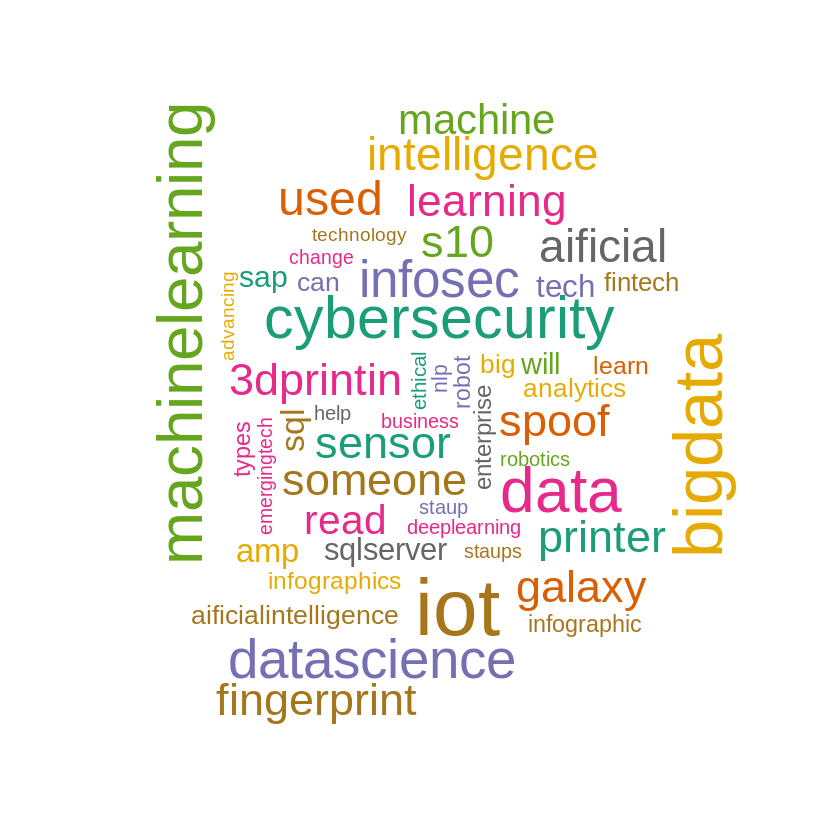

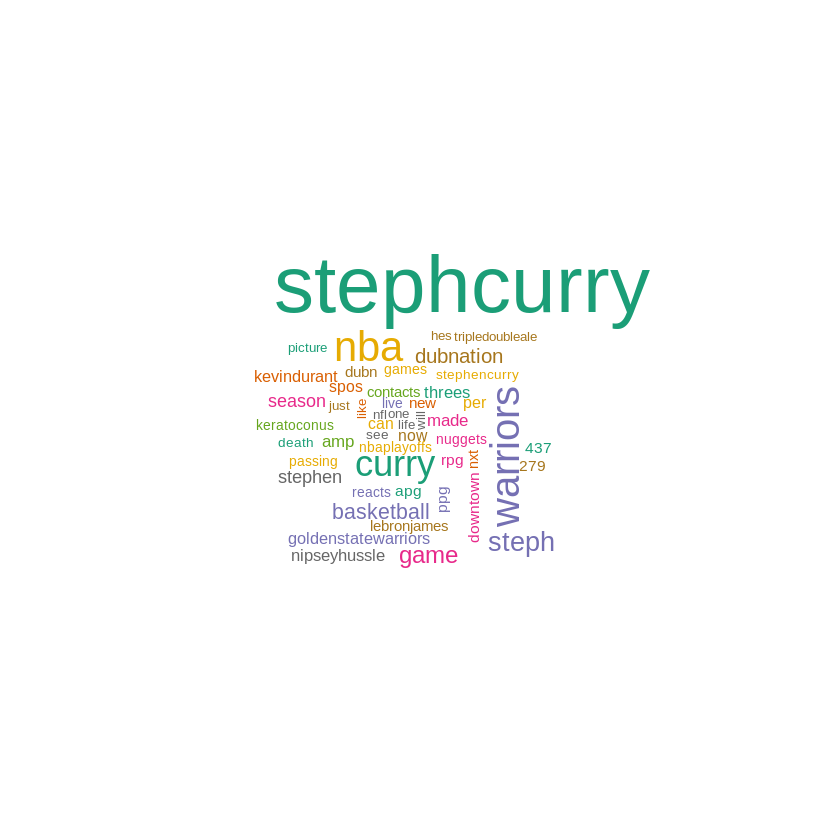

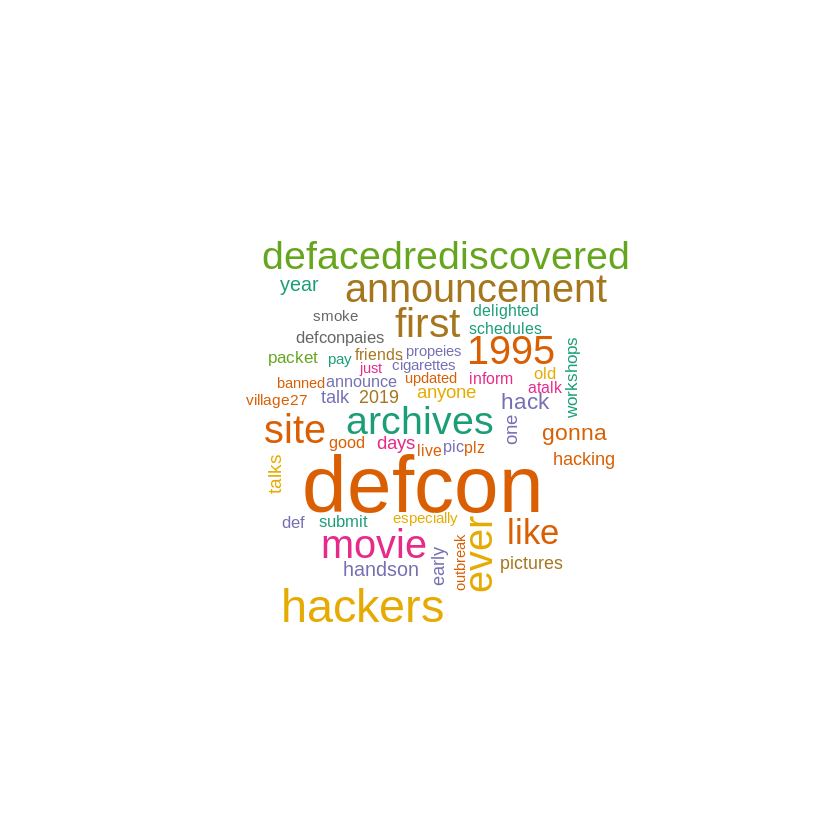

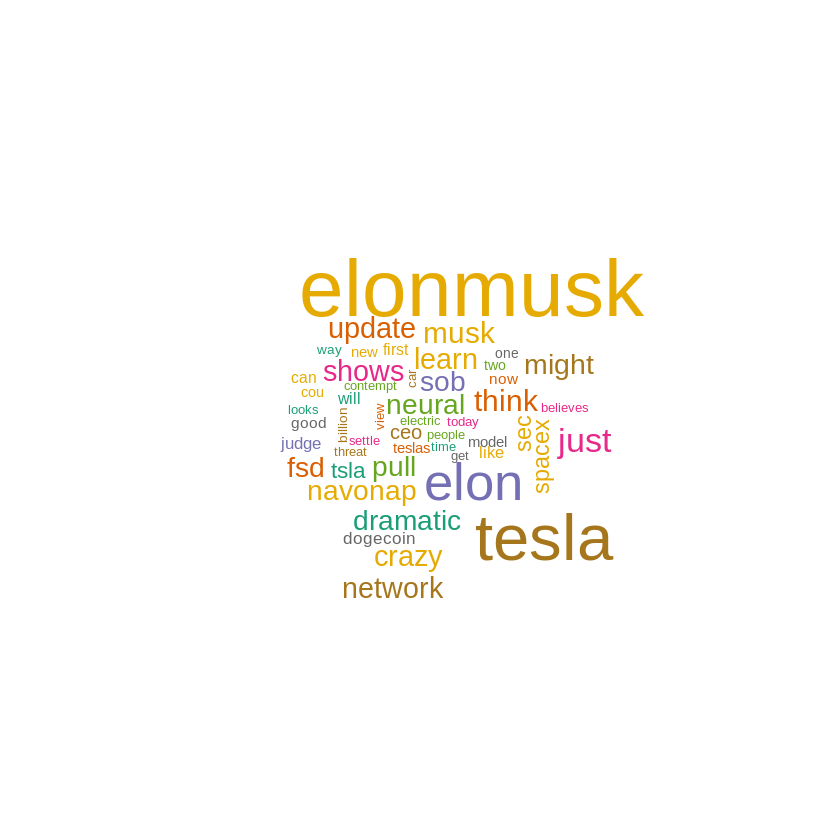

In [9]:
wordcloud(machine_learning_corpus,min.freq = 10,colors=brewer.pal(8, "Dark2"),random.color = TRUE,font = 1,max.words=50)
wordcloud(steph_curry_corpus,min.freq = 10,colors=brewer.pal(8, "Dark2"),random.color = TRUE,font = 1,max.words=50)
wordcloud(defcon_corpus,min.freq = 10,colors=brewer.pal(8, "Dark2"),random.color = TRUE,font = 1,max.words=50)
wordcloud(elonmusk_corpus,min.freq = 10,colors=brewer.pal(8, "Dark2"),random.color = TRUE,font = 1,max.words=50)

## $\triangleright$ Twitter Sentiment Analysis

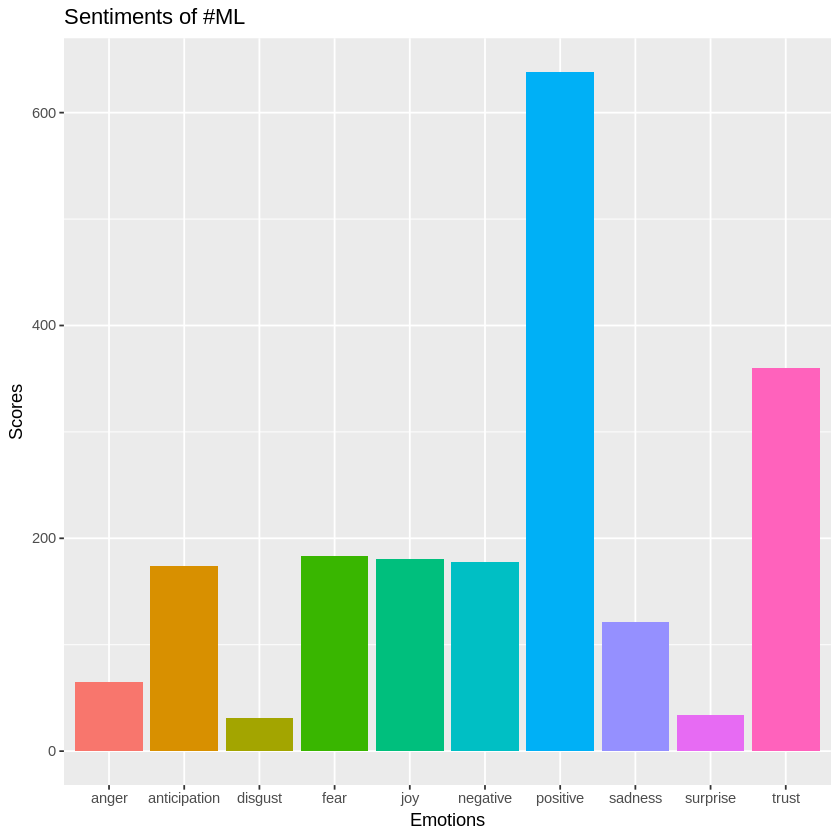

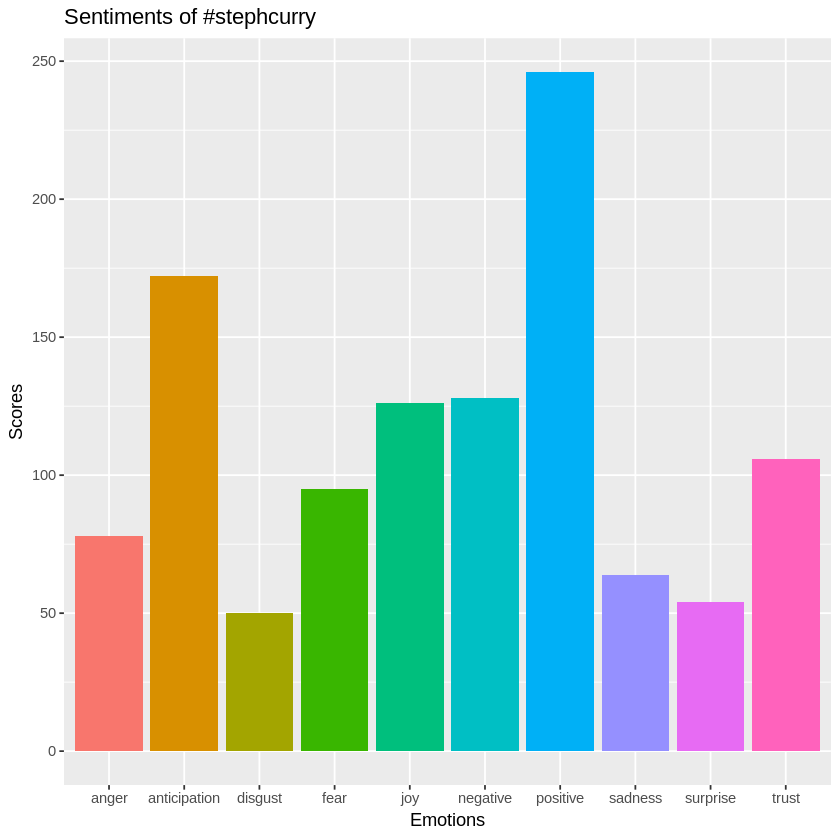

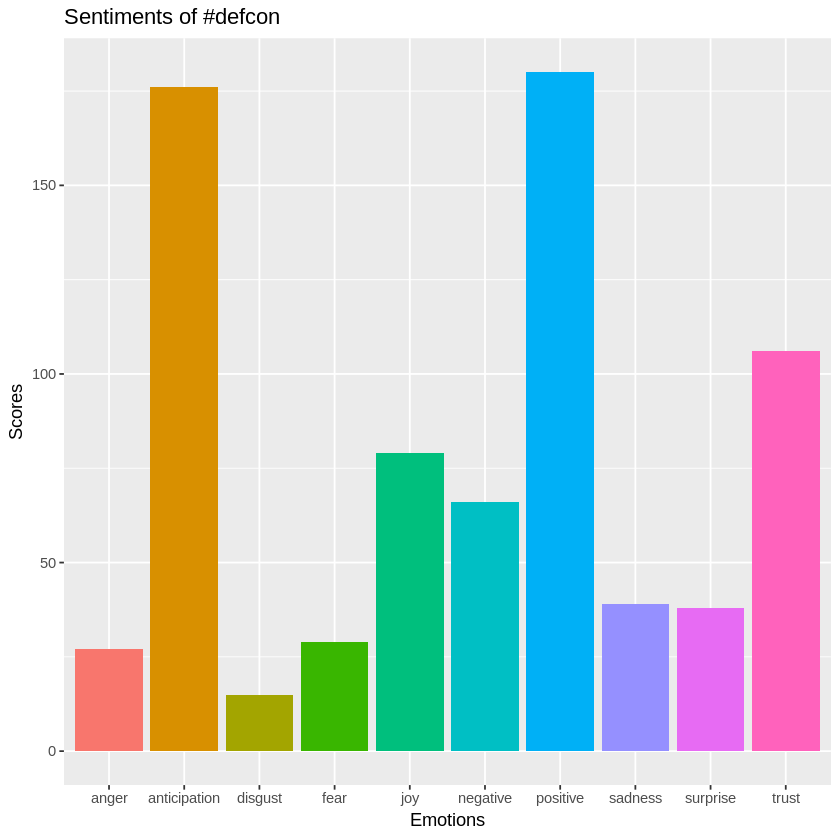

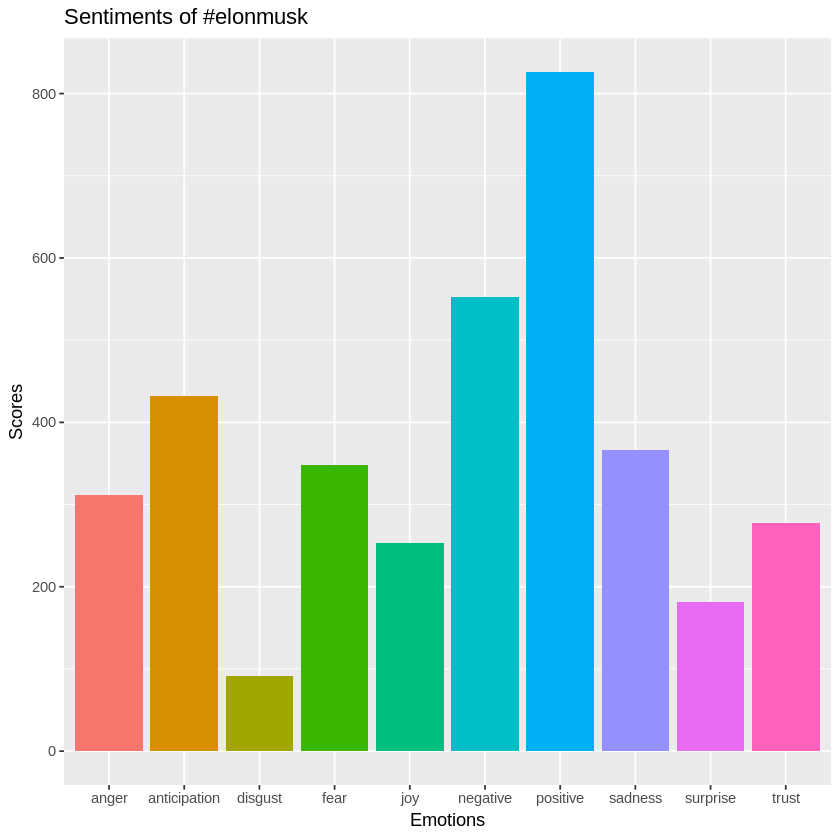

In [10]:
#Getting emotions for every sample
machine_learning_sentiment <- get_nrc_sentiment((machine_learning_text))
steph_curry_sentiment <- get_nrc_sentiment((steph_curry_text))
defcon_sentiment <- get_nrc_sentiment((defcon_text))
elonmusk_sentiment <- get_nrc_sentiment((elonmusk_text))

#Calculating total score for each sentimnent
machine_learning_score <- data.frame(colSums(machine_learning_sentiment[,]))
steph_curry_score <- data.frame(colSums(steph_curry_sentiment[,]))
defcon_score <- data.frame(colSums(defcon_sentiment[,]))
elonmusk_score <- data.frame(colSums(elonmusk_sentiment[,]))

#Set the parameters for plotting
names(machine_learning_score) <-"Score"
machine_learning_score <- cbind("sentiment"=rownames(machine_learning_score),machine_learning_score)
rownames(machine_learning_score) <- NULL

names(steph_curry_score) <-"Score"
steph_curry_score <- cbind("sentiment"=rownames(steph_curry_score),steph_curry_score)
rownames(steph_curry_score) <- NULL

names(defcon_score) <-"Score"
defcon_score <- cbind("sentiment"=rownames(defcon_score),defcon_score)
rownames(defcon_score) <- NULL

names(elonmusk_score) <-"Score"
elonmusk_score <- cbind("sentiment"=rownames(elonmusk_score),elonmusk_score)
rownames(elonmusk_score) <- NULL


#Plotting the sentiment with scores
ggplot(data=machine_learning_score,aes(x=sentiment,y=Score))+geom_bar(aes(fill=sentiment),stat = "identity")+
  theme(legend.position="none")+
  xlab("Emotions")+ylab("Scores")+ggtitle("Sentiments of #ML")

ggplot(data=steph_curry_score,aes(x=sentiment,y=Score))+geom_bar(aes(fill=sentiment),stat = "identity")+
  theme(legend.position="none")+
  xlab("Emotions")+ylab("Scores")+ggtitle("Sentiments of #stephcurry")

ggplot(data=defcon_score,aes(x=sentiment,y=Score))+geom_bar(aes(fill=sentiment),stat = "identity")+
  theme(legend.position="none")+
  xlab("Emotions")+ylab("Scores")+ggtitle("Sentiments of #defcon")

ggplot(data=elonmusk_score,aes(x=sentiment,y=Score))+geom_bar(aes(fill=sentiment),stat = "identity")+
  theme(legend.position="none")+
  xlab("Emotions")+ylab("Scores")+ggtitle("Sentiments of #elonmusk")